# Problem Set 3

## Question 1

In [29]:
#step 1
import pandas as pd
import numpy as np

#step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

#step 3
users = pd.read_csv(url, sep='|')

#step 4
users.groupby('occupation').age.mean()

#step 5
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

users['gender_num'] = users['gender'].apply(gender_to_numeric)

male_ratio = users.groupby('occupation').gender_num.sum() / users.occupation.value_counts() * 100
male_ratio.sort_values(ascending=False)

#step 6
users.groupby('occupation').age.agg(['min', 'max'])

#step 7 
users.groupby(['occupation', 'gender']).age.mean()

#step 8
occup_count = users.groupby('occupation').gender.count()

gender_count = users.groupby(['occupation', 'gender']).gender.count()

gender_pct = gender_count / occup_count * 100

print(gender_pct.unstack('gender'))


gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


## Question 2

In [3]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url, encoding='utf-8-sig')

euro12 = pd.read_csv(url, encoding='utf-8-sig')

euro12.Goals

euro12.Team.nunique()

euro12.shape[1]

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)

discipline['Yellow Cards'].mean()

euro12[euro12.Goals > 6]

euro12[euro12.Team.str.startswith('G')]

euro12.iloc[:, :7]

euro12.iloc[:, :-3]

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

In [28]:
import numpy as np
import pandas as pd

s1 = pd.Series(np.random.randint(1, 5, size=100))

s2 = pd.Series(np.random.randint(1, 4, size=100))

s3 = pd.Series(np.random.randint(10000, 30001, size=100))

df = pd.concat([s1, s2, s3], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([s1, s2, s3], ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn)

print(bigcolumn.index.max()) # prints 299, which means the DataFrame goes until index 299

df = df.reindex(range(300))

299


## Question 4

In [27]:
import pandas as pd
import numpy as np

data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])

data = data.set_index('Yr_Mo_Dy')

def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.to_datetime(year * 10000 + x.month * 100 + x.day, format='%Y%m%d')

data.index = data.index.map(fix_century)

data.index = pd.to_datetime(data.index, format='%Y-%m-%d')

missing_values_count = data.isnull().sum()

non_missing_values_count = data.count().sum()

mean_wind_speed = data.mean().mean()

loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

january_data = data[data.index.month == 1]
january_data.groupby(january_data.index.year).mean()

yearly_data = data.resample('A').mean()

monthly_data = data.resample('M').mean()

weekly_data = data.resample('W').mean()

weekly_stats = pd.DataFrame()
weekly_stats['min'] = weekly_data.min(axis=1)
weekly_stats['max'] = weekly_data.max(axis=1)
weekly_stats['mean'] = weekly_data.mean(axis=1)
weekly_stats['std'] = weekly_data.std(axis=1)

weekly_stats.head(52)


,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.290000,18.500000,13.018182,2.808875
1961-01-08,6.417143,13.541429,9.847659,2.601705
1961-01-15,4.630000,12.468571,8.353214,2.719649
1961-01-22,6.328571,13.204286,9.368413,2.224531
1961-01-29,12.720000,22.530000,16.958095,2.915635
1961-02-05,8.247143,16.827143,11.800357,2.807310
1961-02-12,10.774286,21.832857,15.891548,3.147412
1961-02-19,9.542857,21.167143,13.726825,3.105819
1961-02-26,8.524286,16.304286,12.604286,2.364323


## Question 5

In [26]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

chipo = pd.read_csv(url, sep='\t')

chipo.head(10)

len(chipo)

len(chipo.columns)

print(chipo.columns)

chipo.index

most_ordered_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)
most_ordered_item.index[0]

most_ordered_item_quantity = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)['quantity']
most_ordered_item_quantity[0]

chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1).index[0]

total_items_ordered = chipo['quantity'].sum()
total_items_ordered

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['item_price'].dtype

revenue = (chipo['quantity'] * chipo['item_price']).sum()
round(revenue, 2)

orders = chipo['order_id'].nunique()
orders

average_revenue_per_order = revenue / orders

chipo['item_name'].nunique()


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


50

## Question 6

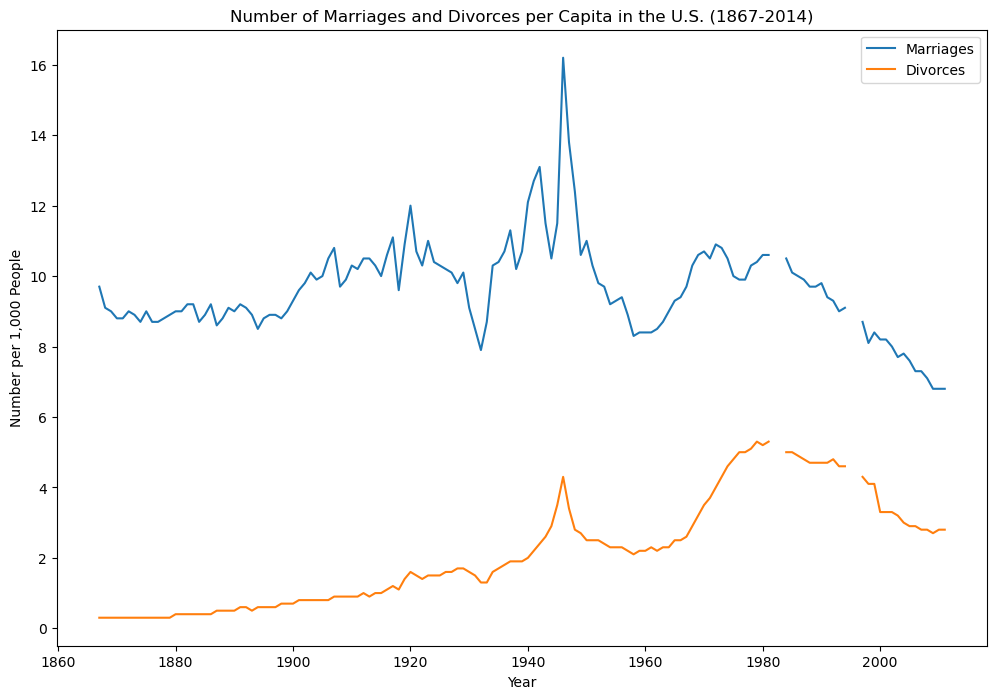

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

df.set_index('Year', inplace=True)

df.plot(y=['Marriages_per_1000', 'Divorces_per_1000'], figsize=(12,8))
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Number per 1,000 People')
plt.legend(['Marriages', 'Divorces'])
plt.show()


## Question 7

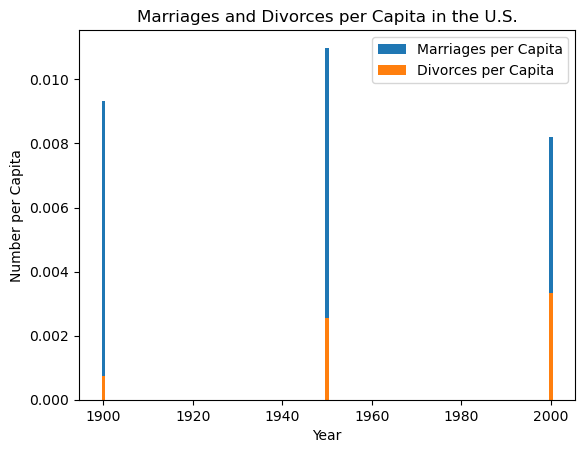

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

data = data[data['Year'].isin([1900, 1950, 2000])]

data['Marriages per Capita'] = data['Marriages']/data['Population']
data['Divorces per Capita'] = data['Divorces']/data['Population']

plt.bar(data['Year'], data['Marriages per Capita'], label='Marriages per Capita')
plt.bar(data['Year'], data['Divorces per Capita'], label='Divorces per Capita')
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Marriages and Divorces per Capita in the U.S.')
plt.legend()
plt.show()


## Question 8

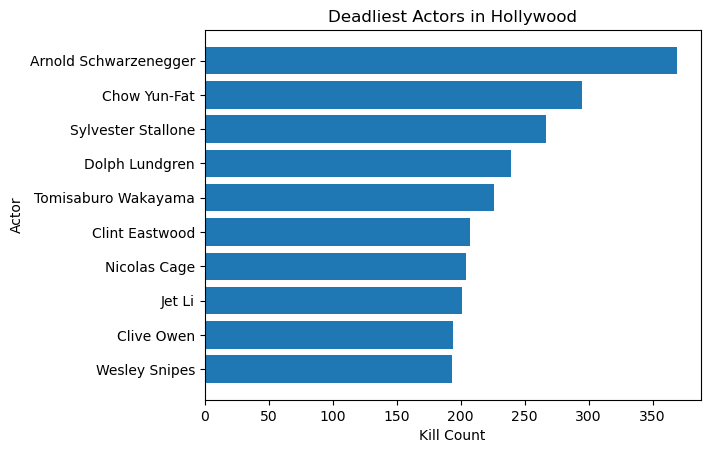

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("actor_kill_counts.csv")

data = data.sort_values("Count")

plt.barh(data["Actor"], data["Count"])

plt.title("Deadliest Actors in Hollywood")
plt.xlabel("Kill Count")
plt.ylabel("Actor")

plt.show()


## Question 9

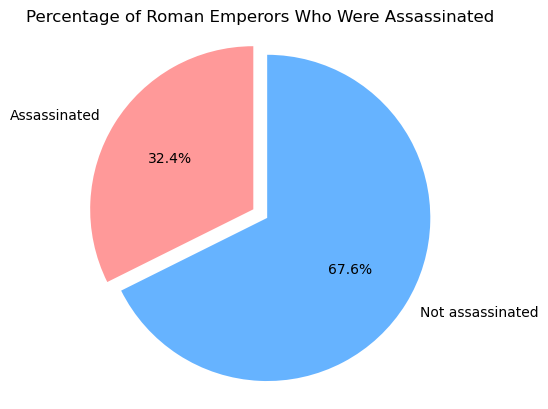

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('roman-emperor-reigns.csv')

num_assassinated = len(df[df['Cause_of_Death'] == 'Assassinated'])

total_emperors = len(df)

percentage_assassinated = num_assassinated / total_emperors * 100

labels = ['Assassinated', 'Not assassinated']
sizes = [percentage_assassinated, 100 - percentage_assassinated]
explode = (0.1, 0)
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Percentage of Roman Emperors Who Were Assassinated')
plt.show()


## Question 10

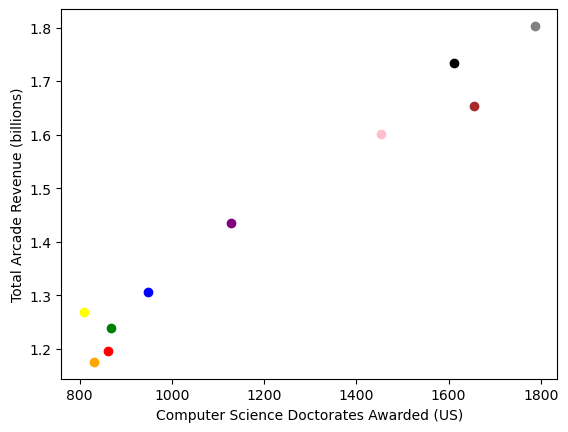

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

fig, ax = plt.subplots()

colors = {2000: 'red', 2001: 'orange', 2002: 'yellow', 2003: 'green',
          2004: 'blue', 2005: 'purple', 2006: 'pink', 2007: 'brown',
          2008: 'gray', 2009: 'black'}

for index, row in data.iterrows():
    year = row['Year'].astype(int)
    ax.scatter(row['Computer Science Doctorates Awarded (US)'], 
               row['Total Arcade Revenue (billions)'], color=colors[year])

ax.set_xlabel('Computer Science Doctorates Awarded (US)')
ax.set_ylabel('Total Arcade Revenue (billions)')

plt.show()


# End of File!